In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import math
student_data=pd.read_csv("StudentsPerformance(1).csv")
student_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [2]:
print("#no of students"+str(len(student_data.index)))

#no of students1000


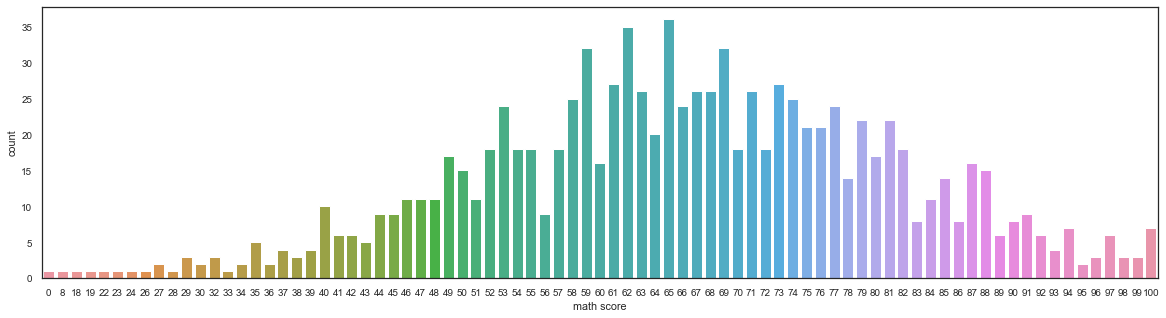

In [3]:
#plot math score using countplot
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [20, 5]})
sns.countplot(x="math score",data=student_data)

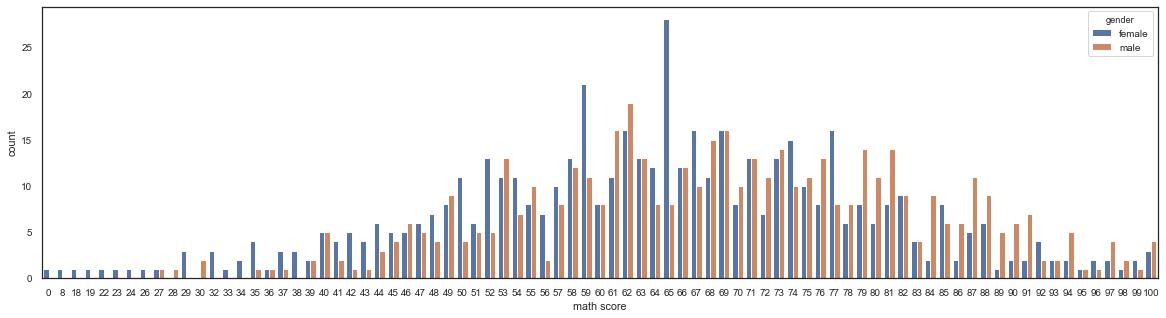

In [4]:
#plot math  score against gender
sns.countplot(x="math score",hue="gender",data=student_data)

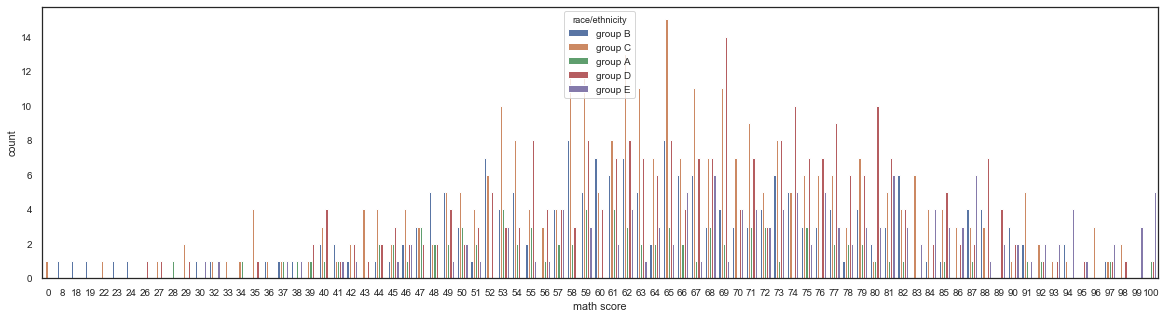

In [5]:
#plot math score against race/ethnicity
sns.countplot(x="math score",hue="race/ethnicity",data=student_data)

In [6]:
#check sum of null values for each column 
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

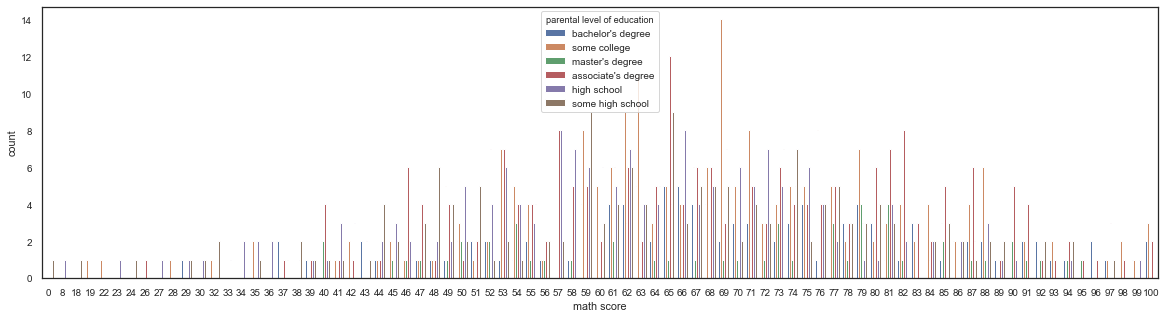

In [7]:
#plot math score against parental level of education
sns.countplot(x="math score",hue="parental level of education",data=student_data)

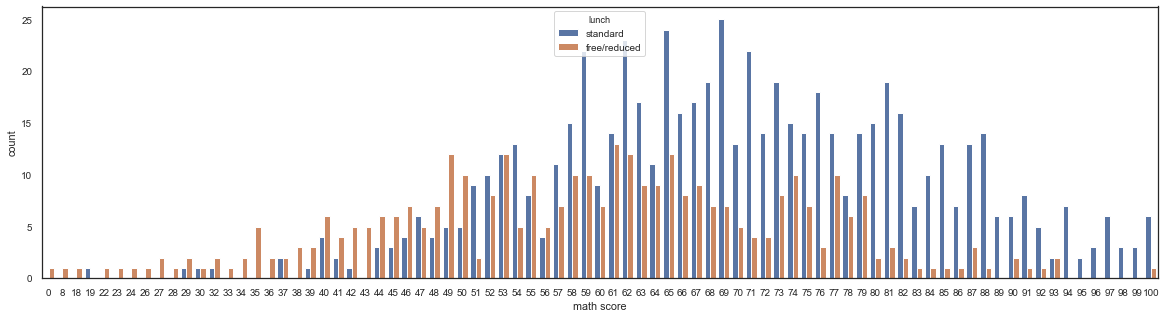

In [8]:
#plot math score against lunch
sns.countplot(x="math score",hue="lunch",data=student_data)
#when lunch is standard the math score is high

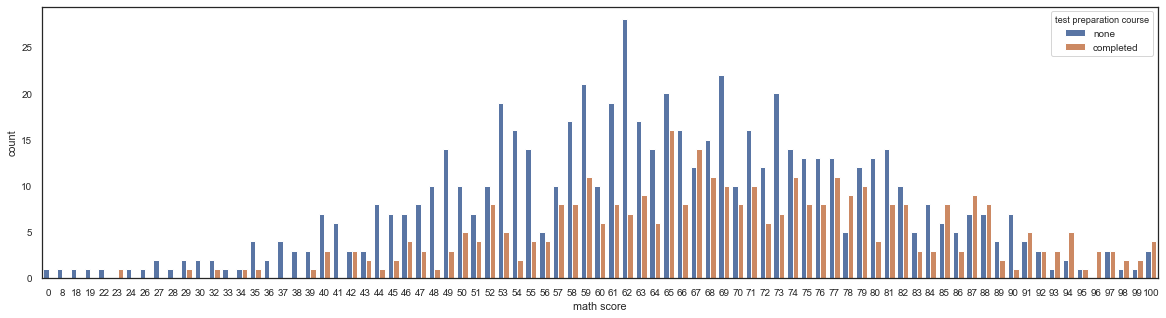

In [9]:
#plot math score against test preparation course
sns.countplot(x="math score",hue="test preparation course",data=student_data)

In [10]:
#grp the numerical and categorical data together
numerical = ['math score','reading score','writing score']
categorical = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
student_data = student_data[numerical + categorical]
student_data.shape

(1000, 8)

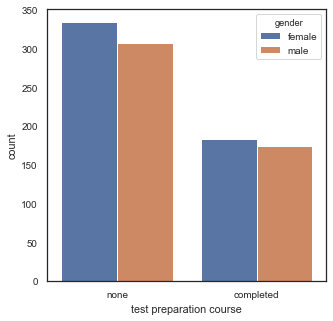

In [12]:
#most of the students have not completed the course,more of female have not completed the course
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [5, 5]})
sns.countplot(hue="gender",x="test preparation course",data=student_data)

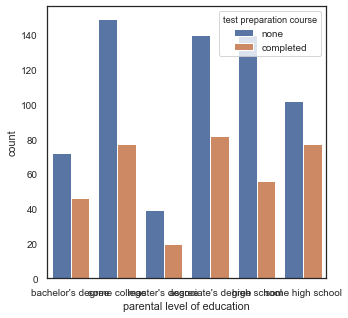

In [13]:
#some college,associate and high school parental level have not completed the course
sns.countplot(hue="test preparation course",x="parental level of education",data=student_data)

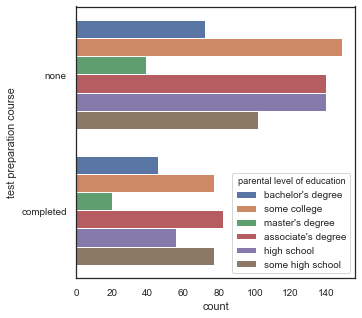

In [14]:
sns.countplot(hue="parental level of education",y="test preparation course",data=student_data)

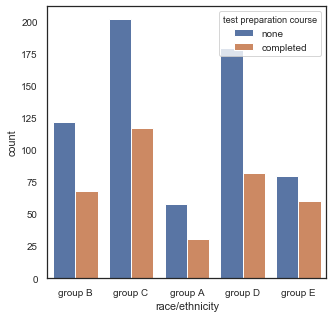

In [15]:
#group C,D have not completed the course max
sns.countplot(hue="test preparation course",x="race/ethnicity",data=student_data)

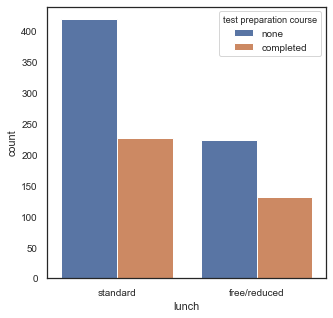

In [16]:
#standard lunch students have not completed test course
sns.countplot(hue="test preparation course",x="lunch",data=student_data)

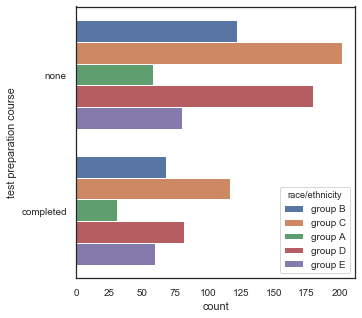

In [17]:
sns.countplot(hue="race/ethnicity",y="test preparation course",data=student_data)

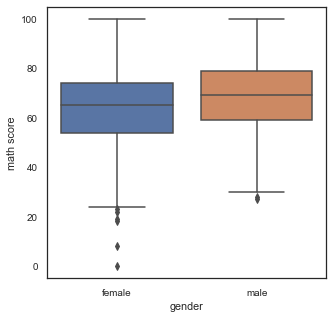

In [18]:
#box plot to see max,min,median and outlayers present in both gender
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [5, 5]})
sns.boxplot(x='gender', y='math score', data=student_data) 

In [20]:
# the average marks of both gender is approx equal,max and min are approx equal but more outlayers are present in female

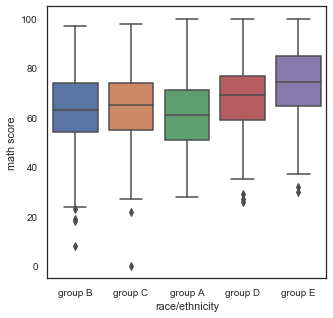

In [21]:
sns.boxplot(x='race/ethnicity', y='math score', data=student_data) 

In [22]:
#avg maths score of grp E is highest,outlayers can be seen in B,C.D,E

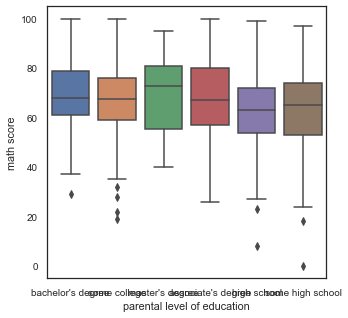

In [23]:
sns.boxplot(x='parental level of education', y='math score', data=student_data) 

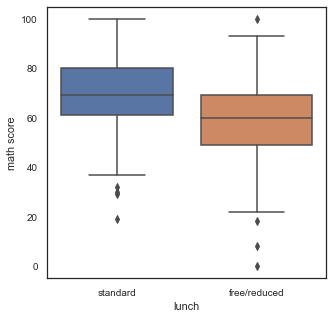

In [24]:
#more students have standard lunch and math score of standard lunch students is high
sns.boxplot(x='lunch', y='math score', data=student_data) 

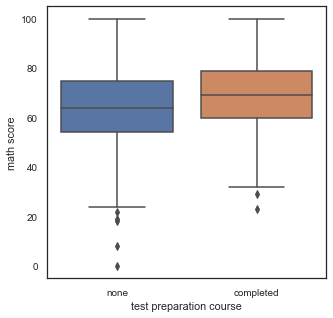

In [25]:
#more students have not completed test course but test prep course completed students have got higher math score comparatively
sns.boxplot(x='test preparation course', y='math score', data=student_data) 

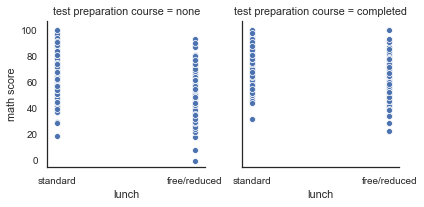

In [26]:
#FacetGrid method used to see relation between varaibles ,here relation between test preparation courseans lunch for maths score
cond_plot = sns.FacetGrid(data=student_data, col='test preparation course', col_wrap=2)
cond_plot.map(sns.scatterplot,'lunch','math score');

In [27]:
# if lunch is standard then irrespective of test prep course the maths score is high

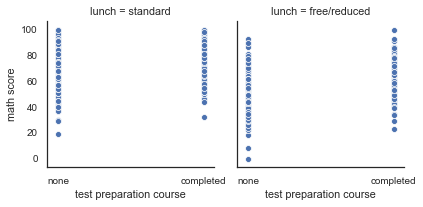

In [28]:
cond_plot = sns.FacetGrid(data=student_data, col='lunch', col_wrap=2)
cond_plot.map(sns.scatterplot,'test preparation course','math score');

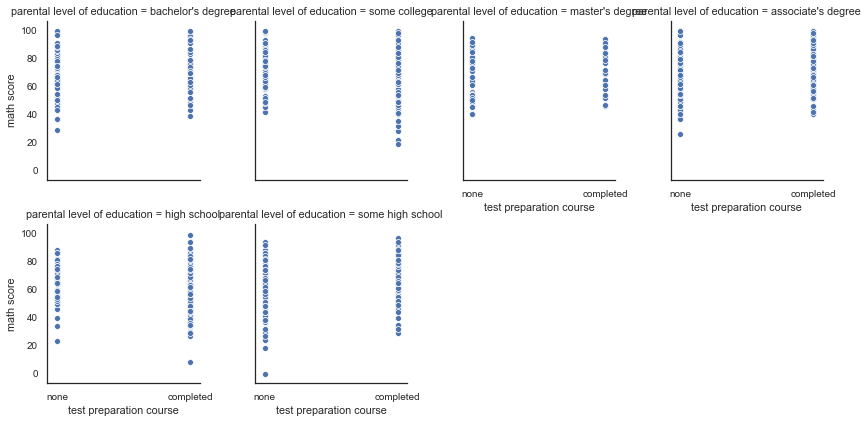

In [29]:
#relation between parental level of education and test preparation course for judging maths score
cond_plot = sns.FacetGrid(data=student_data, col='parental level of education', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','math score');

In [30]:
#bachelor ,master ,associate irrespective of test prep course none or completed is equal and is high

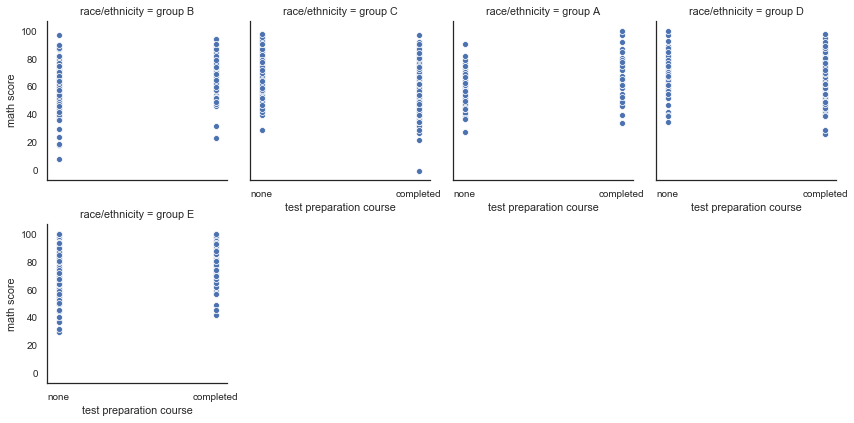

In [31]:
#relation between race and test prep score for seeing math score
cond_plot = sns.FacetGrid(data=student_data, col='race/ethnicity', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','math score');  
#grp E ,D have scored high maths score irrespective of test prep course completed or not

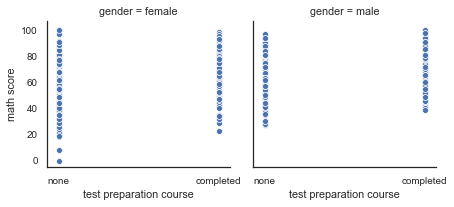

In [32]:
#relation between gender and test prep course for judging math score
cond_plot = sns.FacetGrid(data=student_data, col='gender', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','math score');

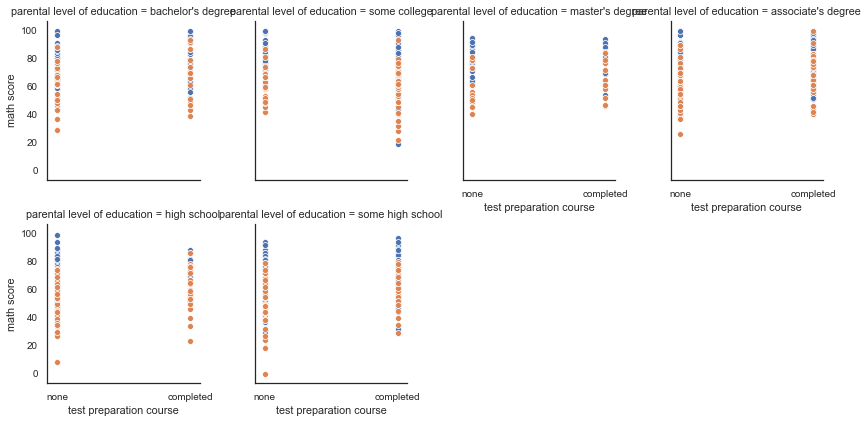

In [33]:
#FacetGrid method used with one more argument hue i.e lunch here(blue means standard lunch and orange means free/reduced lunch)
cond_plot = sns.FacetGrid(data=student_data, col='parental level of education',hue='lunch', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','math score');

In [34]:
#bachelor degree and master degree,lunch standard,test prep course none or completed have achieved highest math score
#in some high school and high school and lunch is free have got less matha score

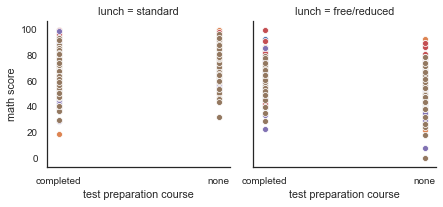

In [35]:
cond_plot = sns.FacetGrid(data=student_data, col='lunch',hue='parental level of education', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','math score');

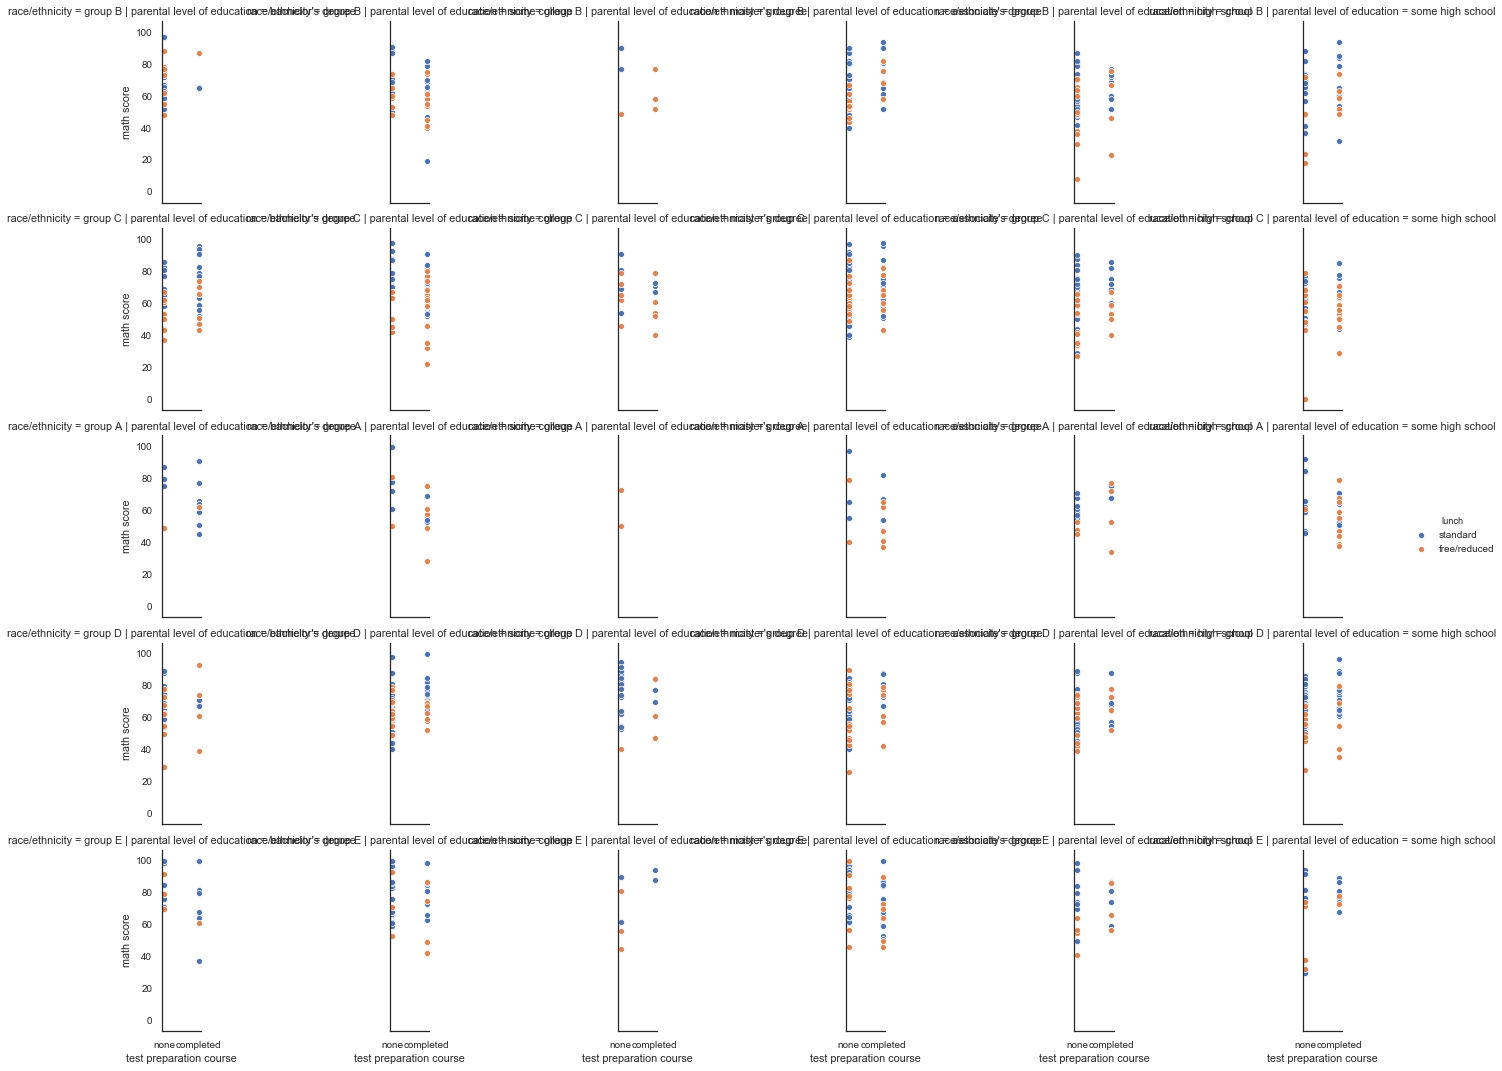

In [88]:
#relation between parental level of education,race,test prep course when hue is lunch 
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 50]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', row='race/ethnicity', hue='lunch')
cond_plot.map(sns.scatterplot, 'test preparation course', 'math score').add_legend()

In [ ]:
#grp E even though not completed the course have attained high math score 
#highest marks is of standard lunch student

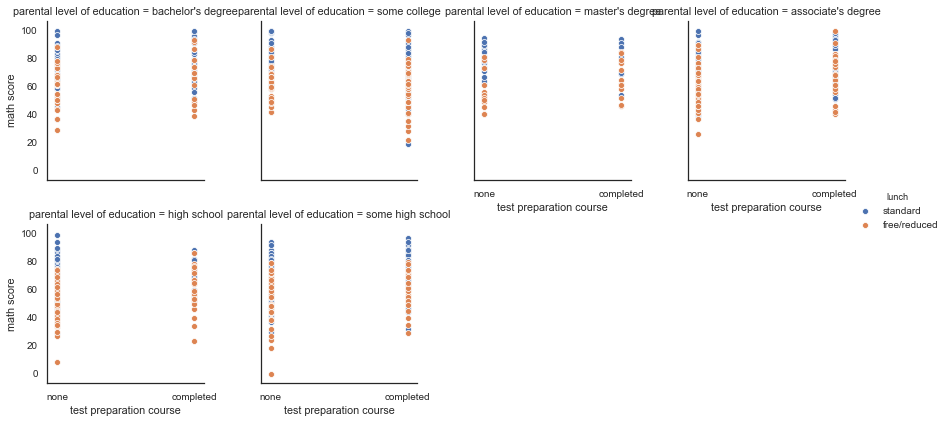

In [37]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'math score').add_legend() 

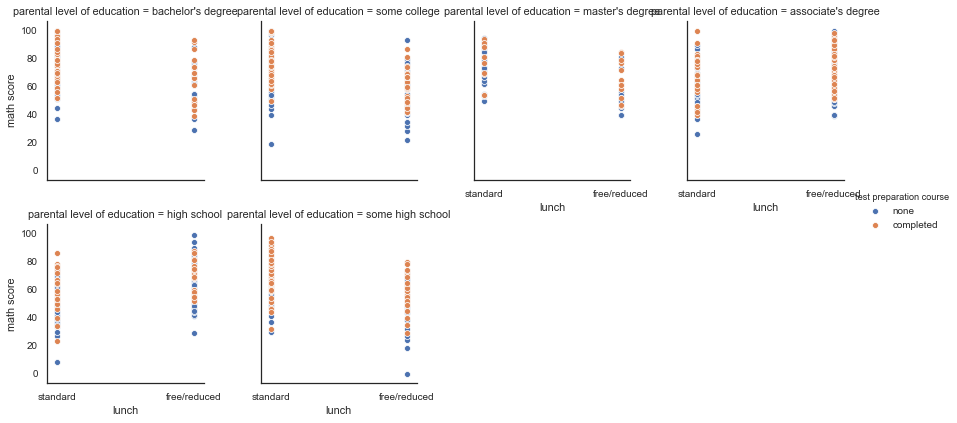

In [38]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', hue='test preparation course',col_wrap=4)
cond_plot.map(sns.scatterplot, 'lunch', 'math score').add_legend()

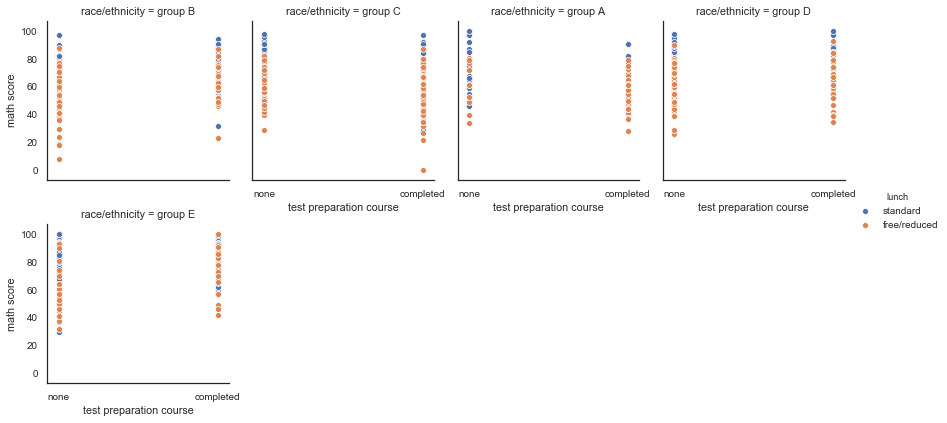

In [39]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='race/ethnicity', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'math score').add_legend()

In [ ]:
#group E students have scored high marks although they have not completed the course

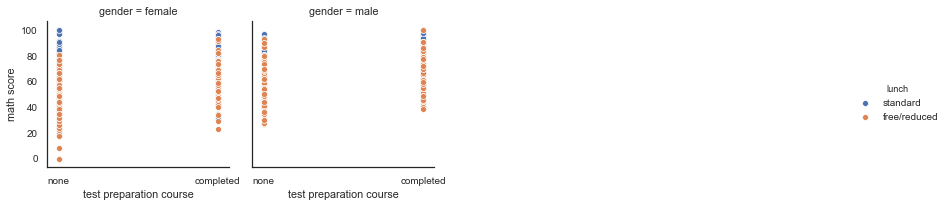

In [40]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='gender', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'math score').add_legend()

In [ ]:
#male students those who have completed test course have scored higher marks

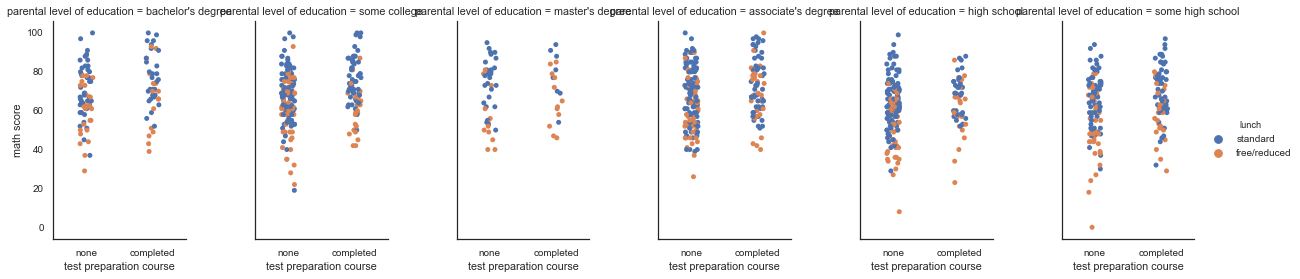

In [91]:
sns.catplot(x="test preparation course", hue="lunch", col="parental level of education",y="math score",
                data=student_data,
                height=4, aspect=0.7);

In [ ]:
# math score of bachelor,some college,associate have got approx same marks irrespective of test prep course completed or not ansd lunch is standard
#highest is acheived by those students who had standard lunch

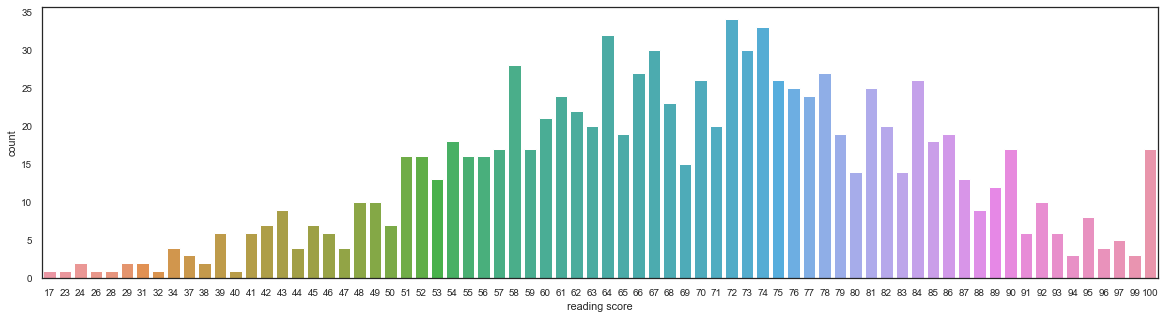

In [41]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [20,5]})
sns.countplot(x="reading score",data=student_data)

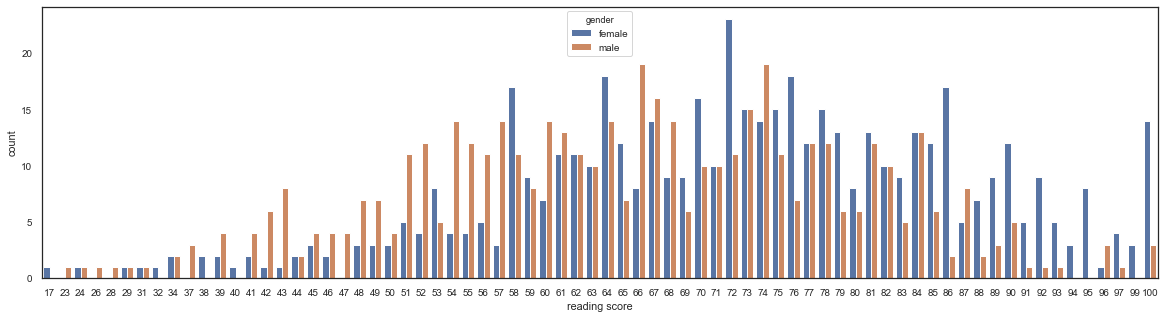

In [42]:
sns.countplot(x="reading score",hue="gender",data=student_data)

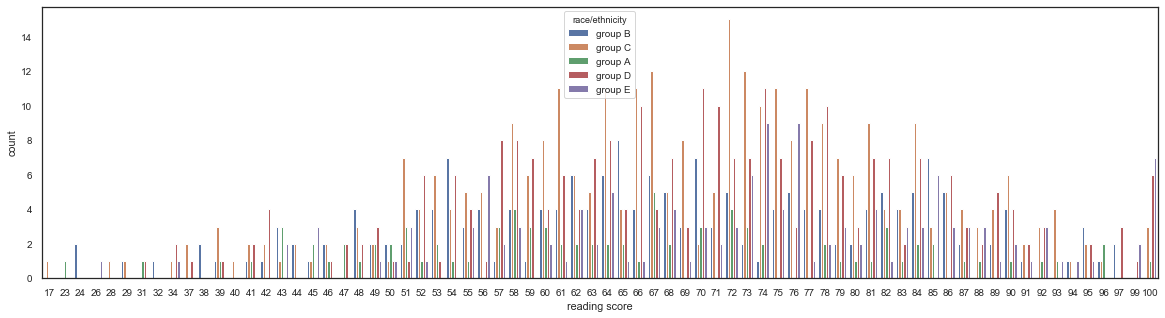

In [43]:
sns.countplot(x="reading score",hue="race/ethnicity",data=student_data)

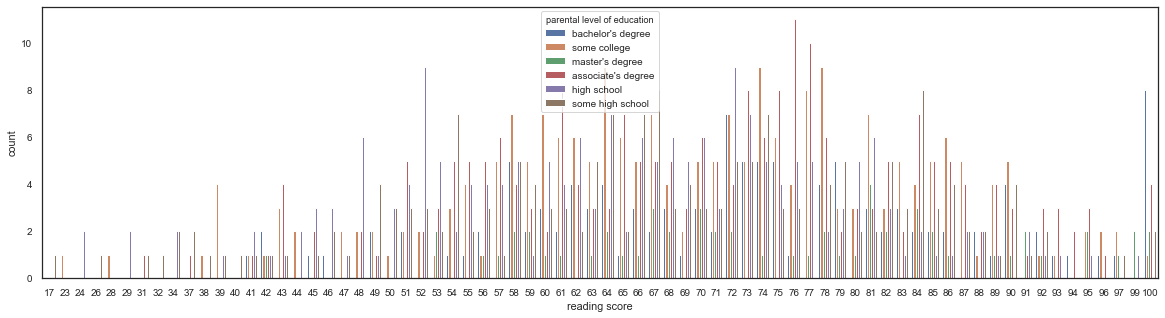

In [44]:
sns.countplot(x="reading score",hue="parental level of education",data=student_data)

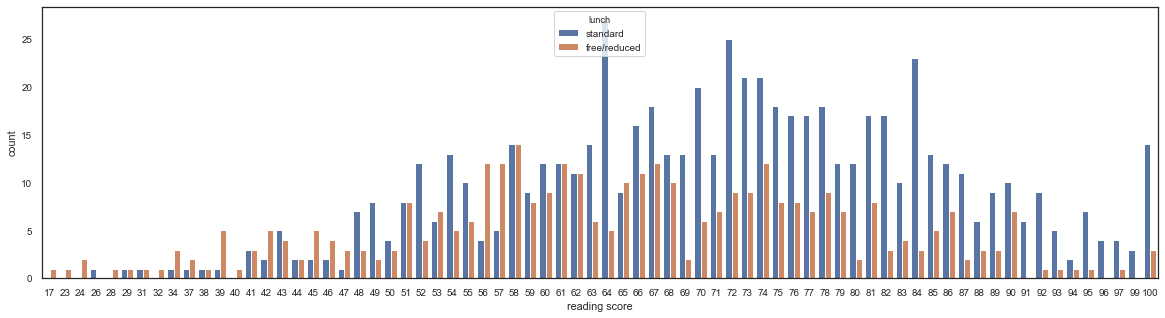

In [45]:
sns.countplot(x="reading score",hue="lunch",data=student_data)

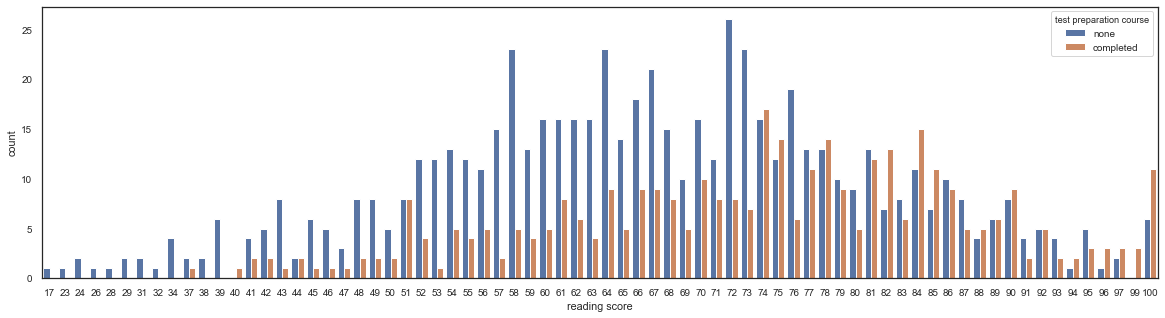

In [46]:
sns.countplot(x="reading score",hue="test preparation course",data=student_data)

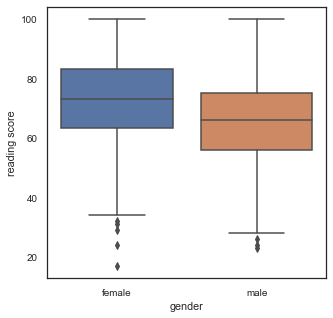

In [47]:
#female have scored high reading marks than male but outlayers are present more in female
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [5,5]})
sns.boxplot(x='gender', y='reading score', data=student_data) 

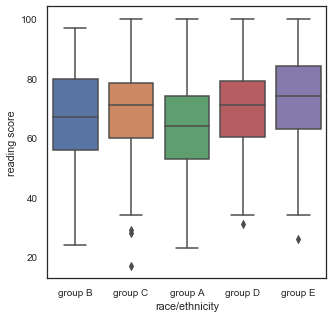

In [48]:
#grp E has scored high reading score and grp A has sccored less reading score
sns.boxplot(x='race/ethnicity', y='reading score', data=student_data) 

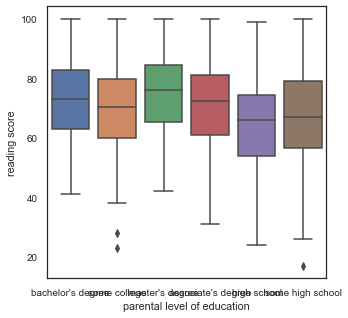

In [49]:
sns.boxplot(x='parental level of education', y='reading score', data=student_data) 
#master degree parental level has got high avg reading score 

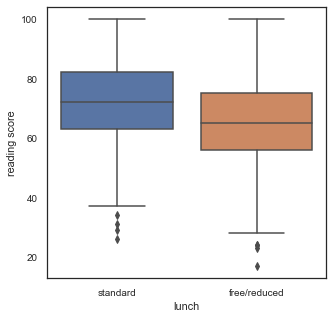

In [50]:
sns.boxplot(x='lunch', y='reading score', data=student_data) 
#standard lunch student have scored high reading score

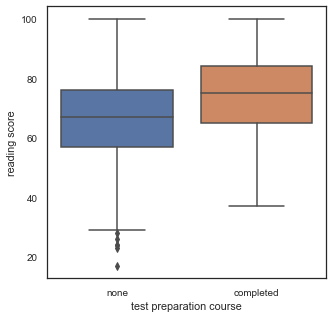

In [51]:
sns.boxplot(x='test preparation course', y='reading score', data=student_data) 
#test prep course complted have scored high reading score

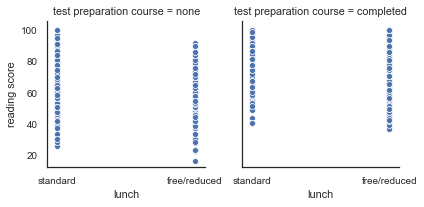

In [52]:
cond_plot = sns.FacetGrid(data=student_data, col='test preparation course', col_wrap=2)
cond_plot.map(sns.scatterplot,'lunch','reading score');
#if test prep course is completed then irrespective of lunch have scored approx same reading score

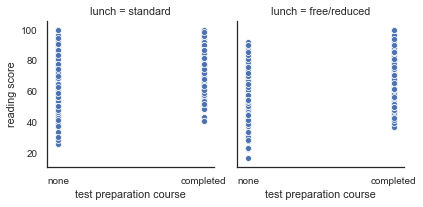

In [53]:
cond_plot = sns.FacetGrid(data=student_data, col='lunch', col_wrap=2)
cond_plot.map(sns.scatterplot,'test preparation course','reading score');

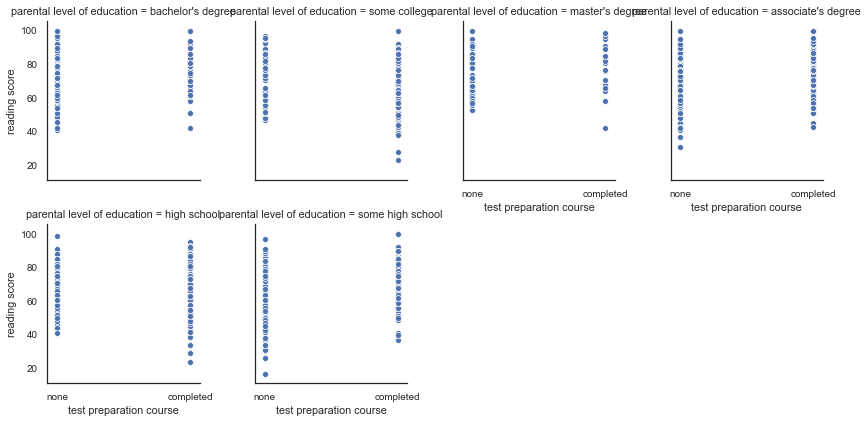

In [55]:
cond_plot = sns.FacetGrid(data=student_data, col='parental level of education', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','reading score');
#bachelor and master parental level have achieved same reading score irrespective of test prep course

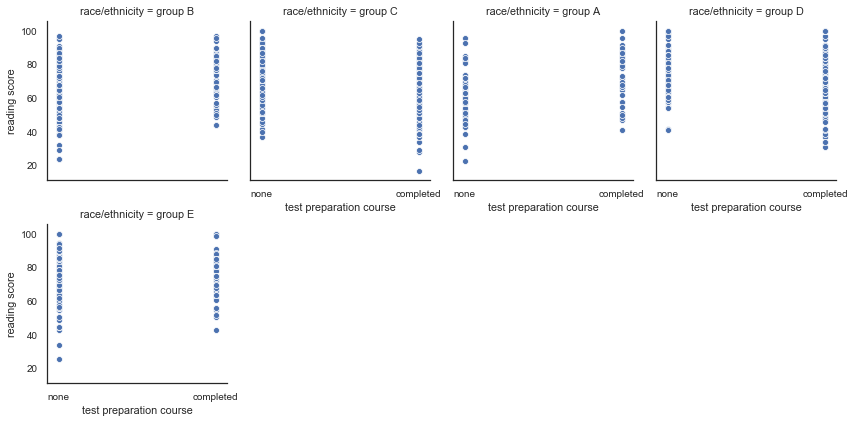

In [56]:
cond_plot = sns.FacetGrid(data=student_data, col='race/ethnicity', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','reading score');  
#grp E has scored same reading score irrespective of test prep course

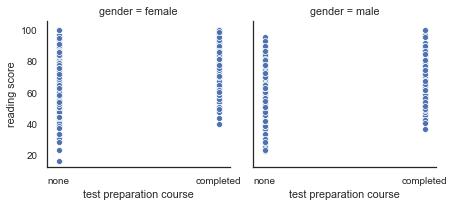

In [57]:
cond_plot = sns.FacetGrid(data=student_data, col='gender', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','reading score')
#female have scored higher than males 
#females those test prep is complted have performed well

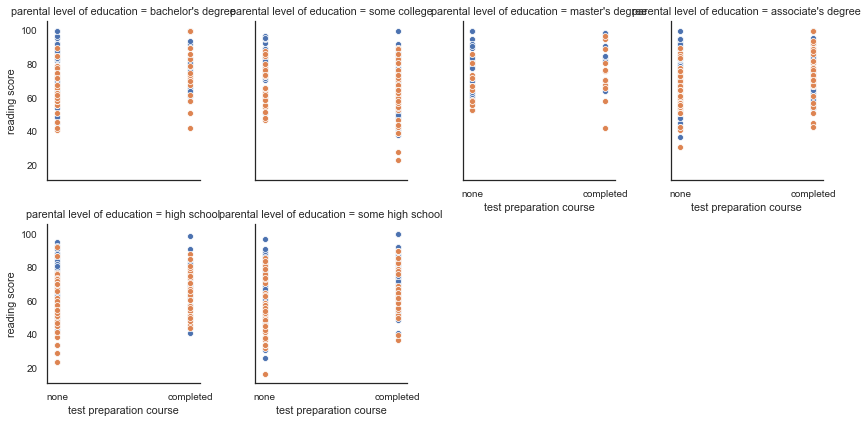

In [58]:
cond_plot = sns.FacetGrid(data=student_data, col='parental level of education',hue='lunch', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','reading score');
#bachelor,master,associate have scored aprox same irrespective of test course but they have standard lunch
#in all those who have standard lunch have achieved higher reading marks

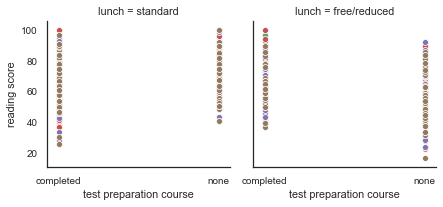

In [59]:
cond_plot = sns.FacetGrid(data=student_data, col='lunch',hue='parental level of education', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','reading score');

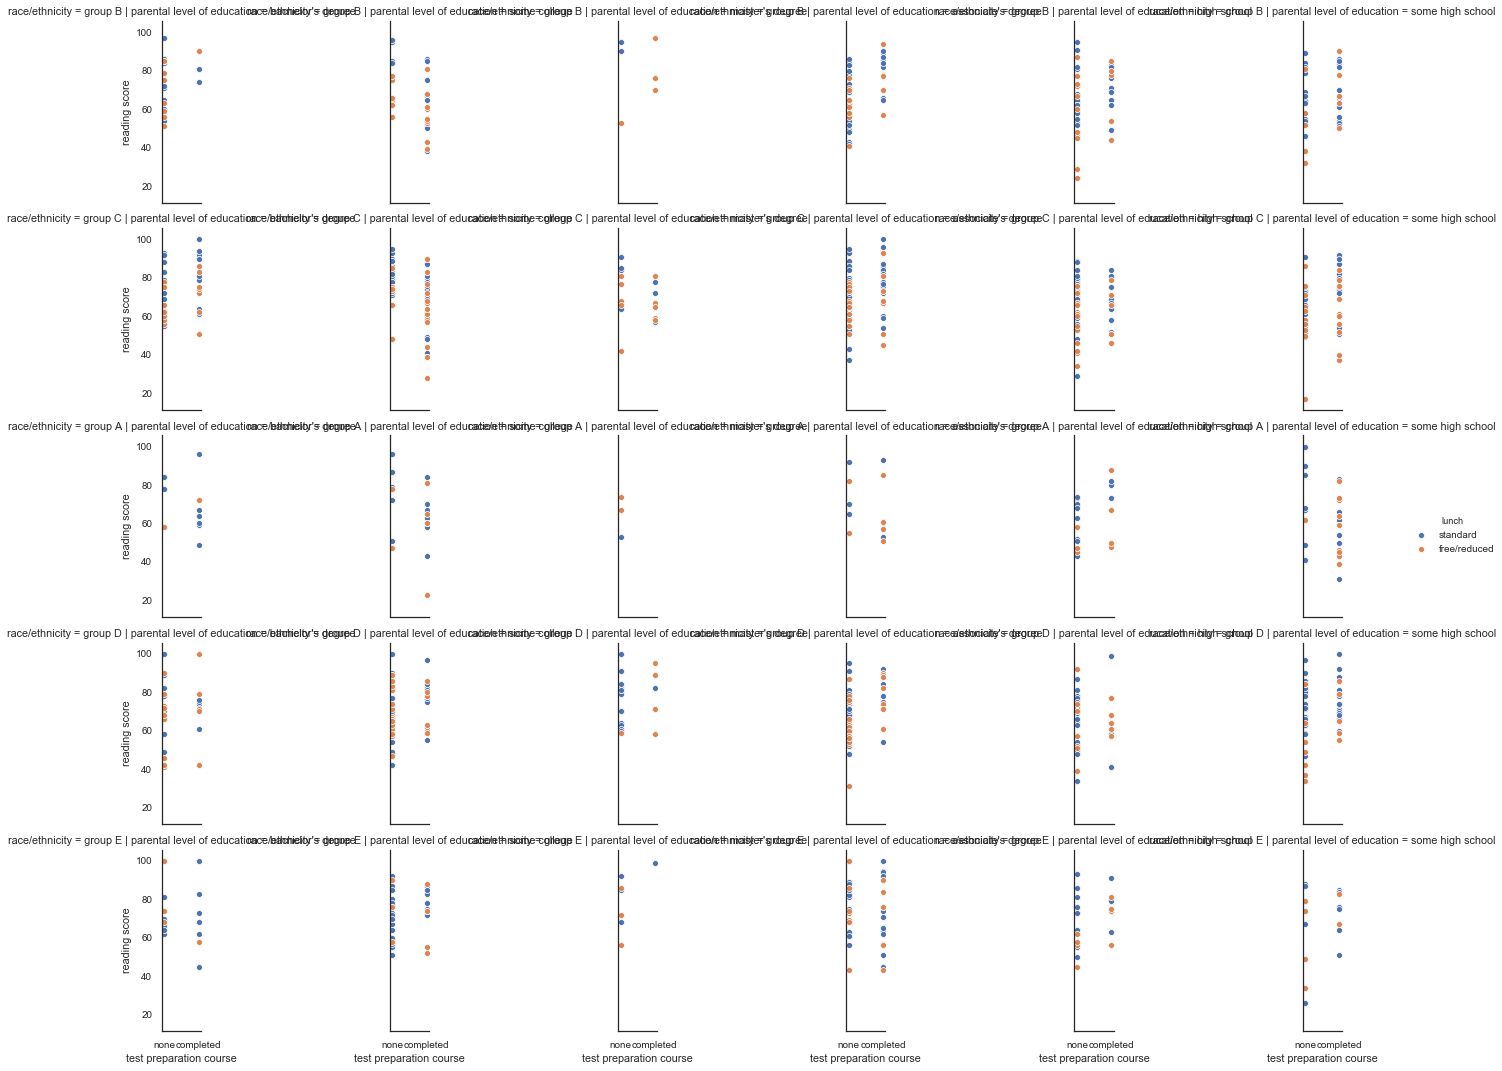

In [60]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', row='race/ethnicity', hue='lunch')
cond_plot.map(sns.scatterplot, 'test preparation course', 'reading score').add_legend()
# grp E has scored same reading marks irrespective of test score
#standard lunch student has achived higher reading score

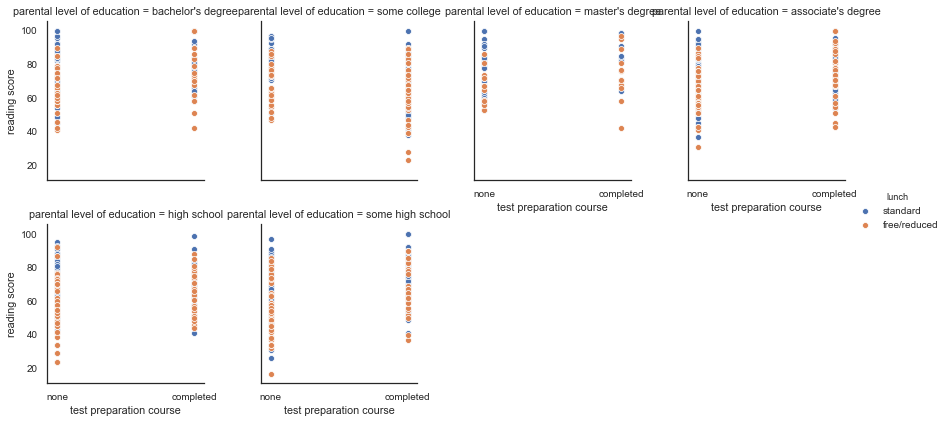

In [61]:
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'reading score').add_legend()

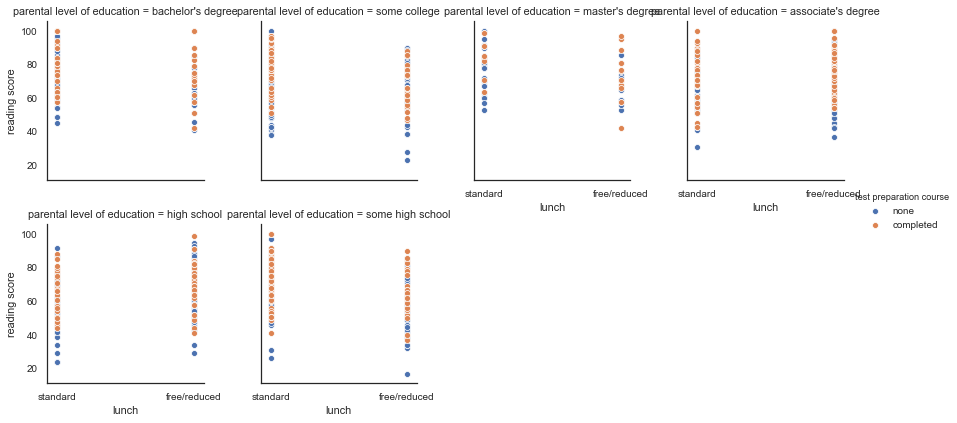

In [62]:
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', hue='test preparation course',col_wrap=4)
cond_plot.map(sns.scatterplot, 'lunch', 'reading score').add_legend()

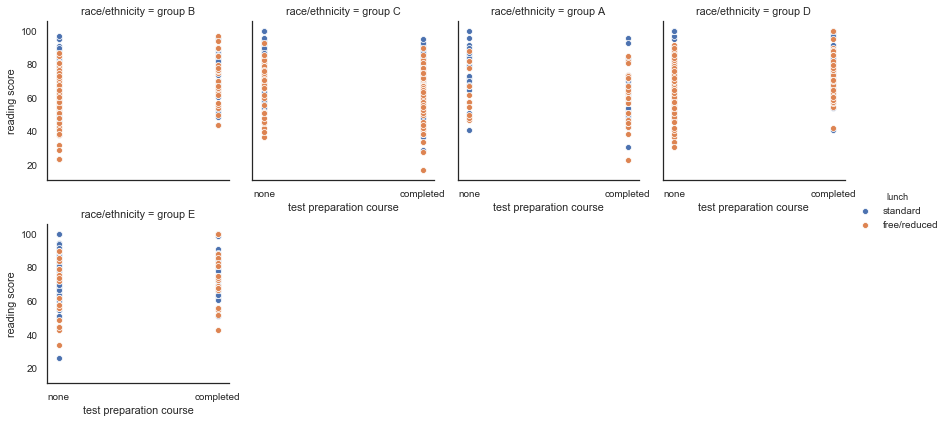

In [63]:
cond_plot =sns.FacetGrid(data=student_data, col='race/ethnicity', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'reading score').add_legend()

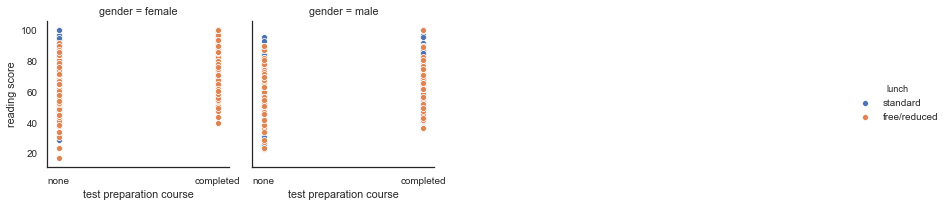

In [64]:
cond_plot =sns.FacetGrid(data=student_data, col='gender', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'reading score').add_legend()

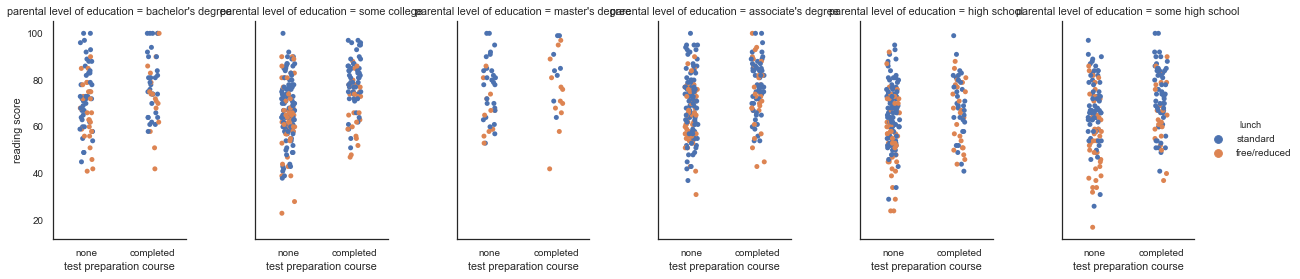

In [92]:
sns.catplot(x="test preparation course", hue="lunch", col="parental level of education",y="reading score",
                data=student_data,
                height=4, aspect=0.7);
#bachelor,master,associate have scored good reading score irrespective of test prpe 
#highest reading score students in all have standard lunch

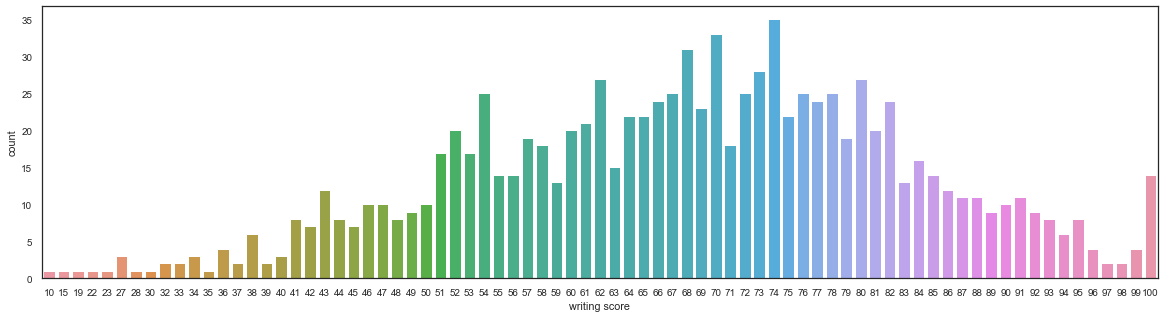

In [65]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [20, 5]})
sns.countplot(x="writing score",data=student_data)

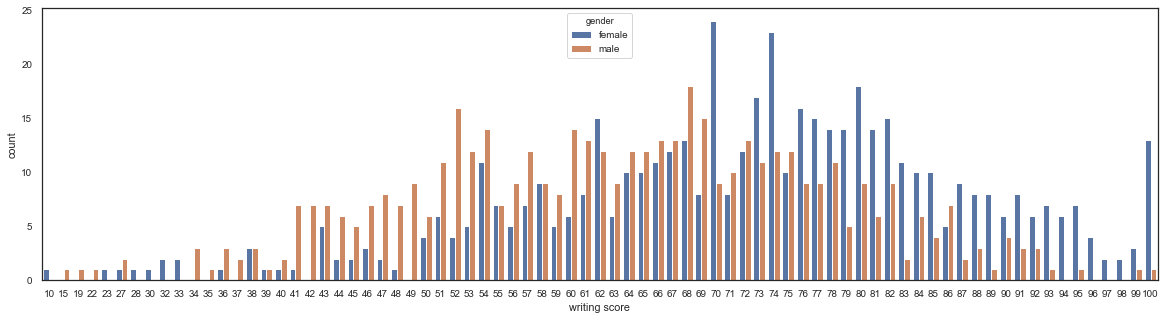

In [66]:
sns.countplot(x="writing score",hue="gender",data=student_data)

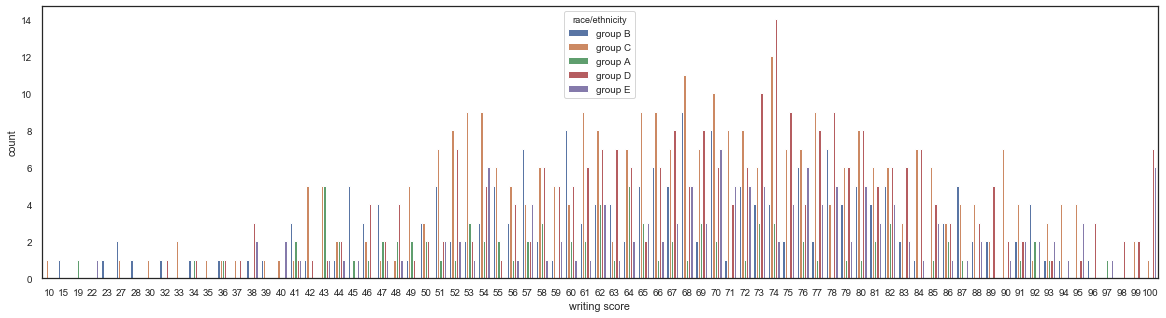

In [67]:
sns.countplot(x="writing score",hue="race/ethnicity",data=student_data)

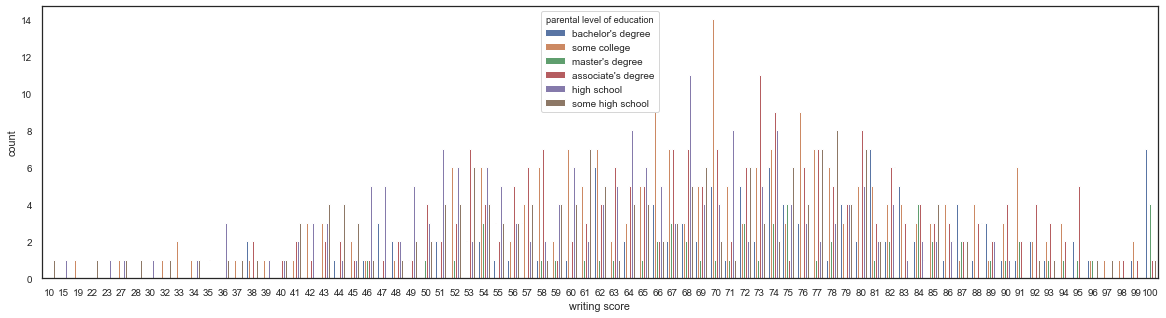

In [68]:
sns.countplot(x="writing score",hue="parental level of education",data=student_data)

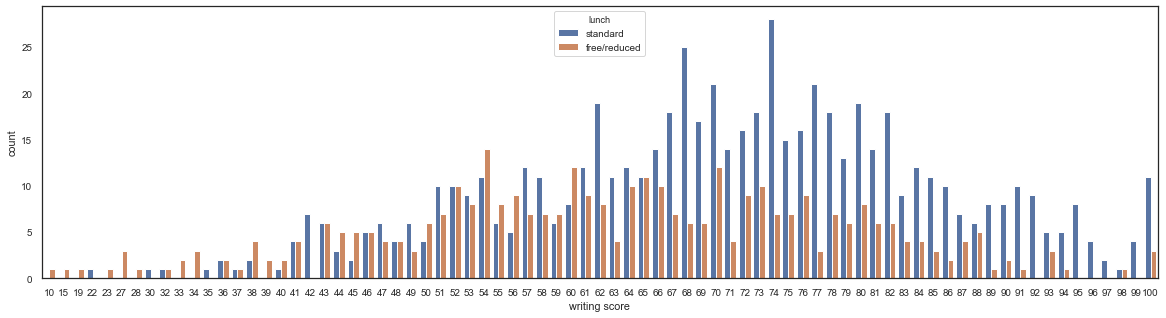

In [69]:
sns.countplot(x="writing score",hue="lunch",data=student_data)

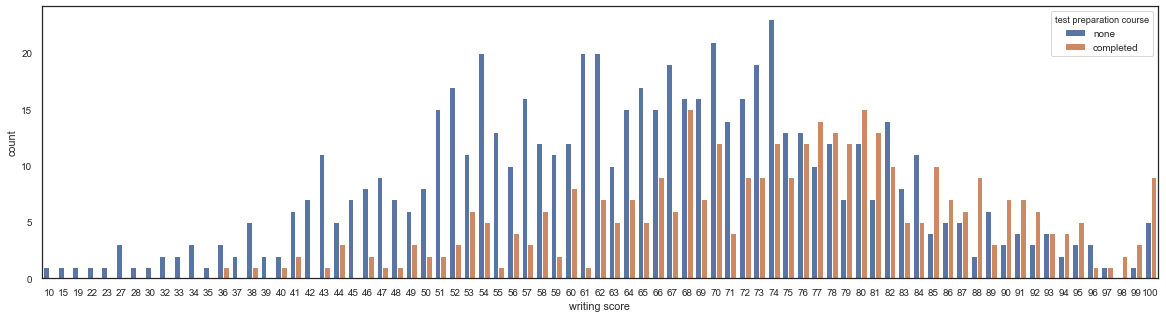

In [70]:
sns.countplot(x="writing score",hue="test preparation course",data=student_data)

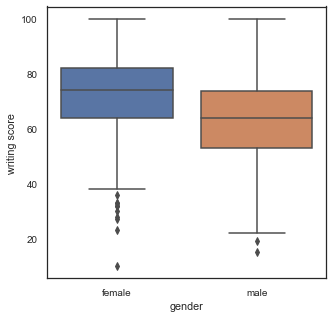

In [71]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [5, 5]})
sns.boxplot(x='gender', y='writing score', data=student_data) 
#female have score higher writing score than males

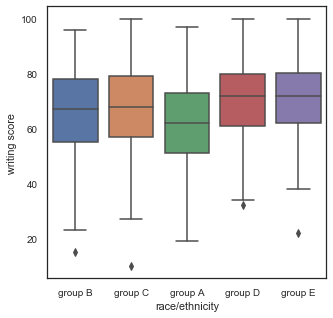

In [72]:
sns.boxplot(x='race/ethnicity', y='writing score', data=student_data) 
#grp A,E have scored higher writing score

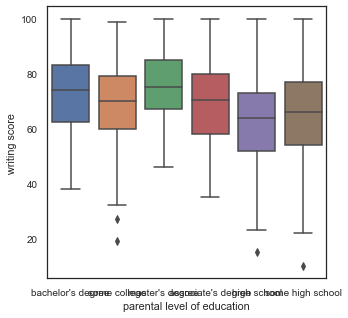

In [73]:
sns.boxplot(x='parental level of education', y='writing score', data=student_data)
#master parental level has scored higher writing score
#some high school,high school have scored less marks

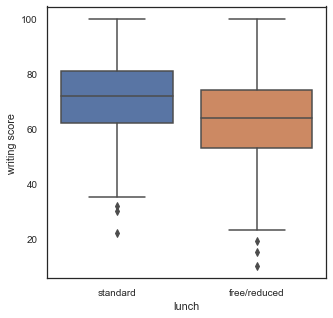

In [74]:
sns.boxplot(x='lunch', y='writing score', data=student_data) 
#standard lunch students have scored higher writing mnarks

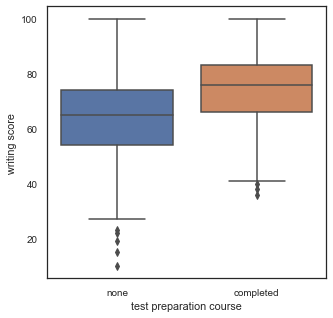

In [75]:
sns.boxplot(x='test preparation course', y='writing score', data=student_data) 
#test prep completed hsve score higher writing score

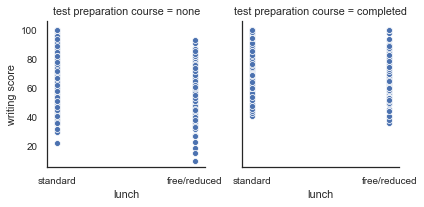

In [76]:
cond_plot = sns.FacetGrid(data=student_data, col='test preparation course', col_wrap=2)
cond_plot.map(sns.scatterplot,'lunch','writing score');
#if luch is standard then test prep course doesnt matter
#test prep completed students have got higher marks

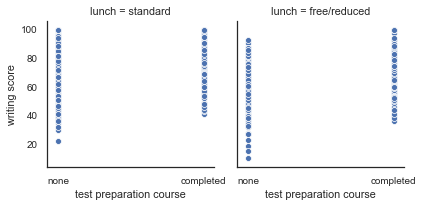

In [77]:
cond_plot = sns.FacetGrid(data=student_data, col='lunch', col_wrap=2)
cond_plot.map(sns.scatterplot,'test preparation course','writing score');

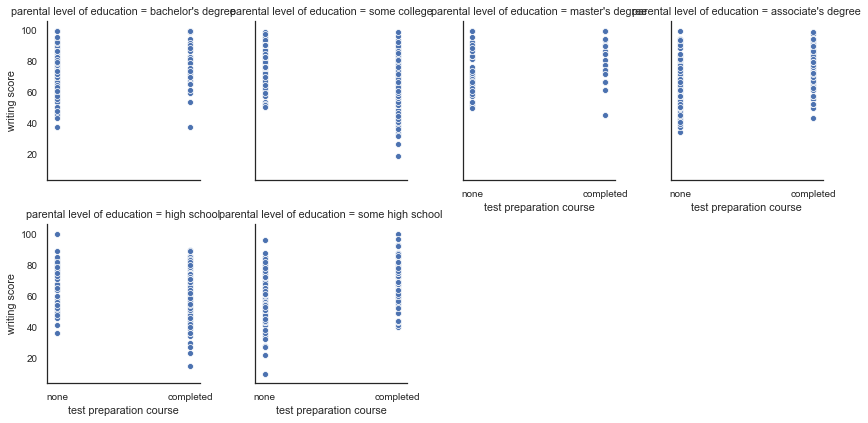

In [78]:
cond_plot = sns.FacetGrid(data=student_data, col='parental level of education', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','writing score');
# bachelor,master and associate degree has got higher marks compared to others irrespective of test prep course

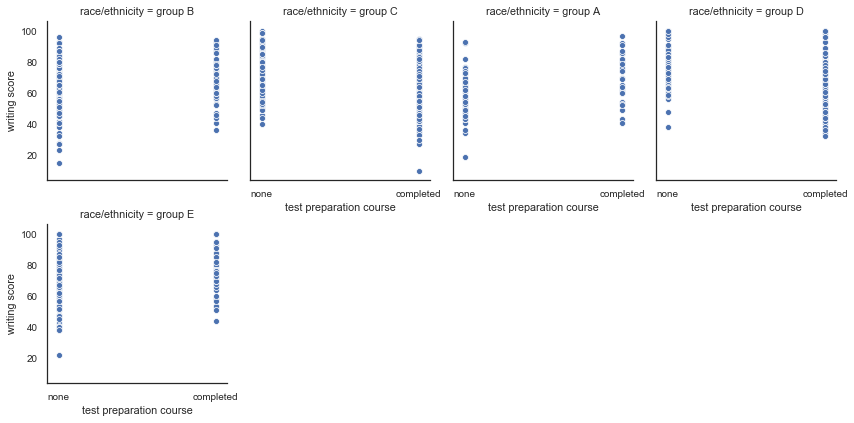

In [79]:
cond_plot = sns.FacetGrid(data=student_data, col='race/ethnicity', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','writing score');  
#grp E has scored approx same marks whether test prep course is completed or not

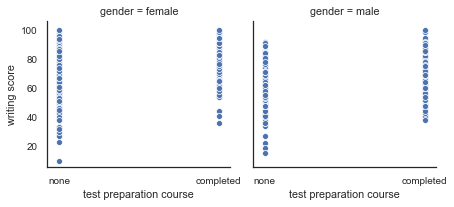

In [80]:
cond_plot = sns.FacetGrid(data=student_data, col='gender', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','writing score');
#female and male whose test course is completed have score higher writing score

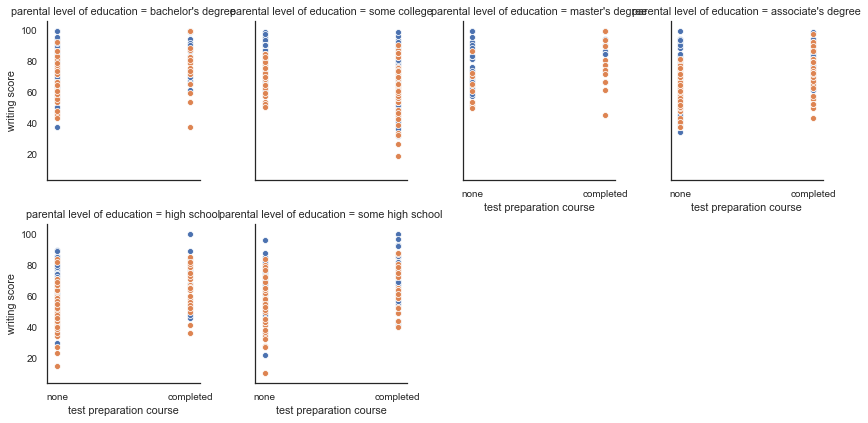

In [81]:
cond_plot = sns.FacetGrid(data=student_data, col='parental level of education',hue='lunch', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','writing score');
#bachelor,master,associate have scored higher writing marks irrespective of test course but lunch is standard

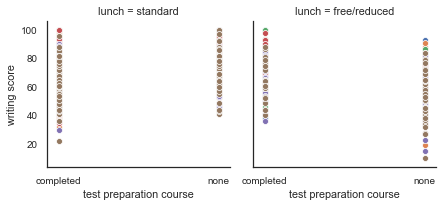

In [82]:
cond_plot = sns.FacetGrid(data=student_data, col='lunch',hue='parental level of education', col_wrap=4)
cond_plot.map(sns.scatterplot,'test preparation course','writing score');

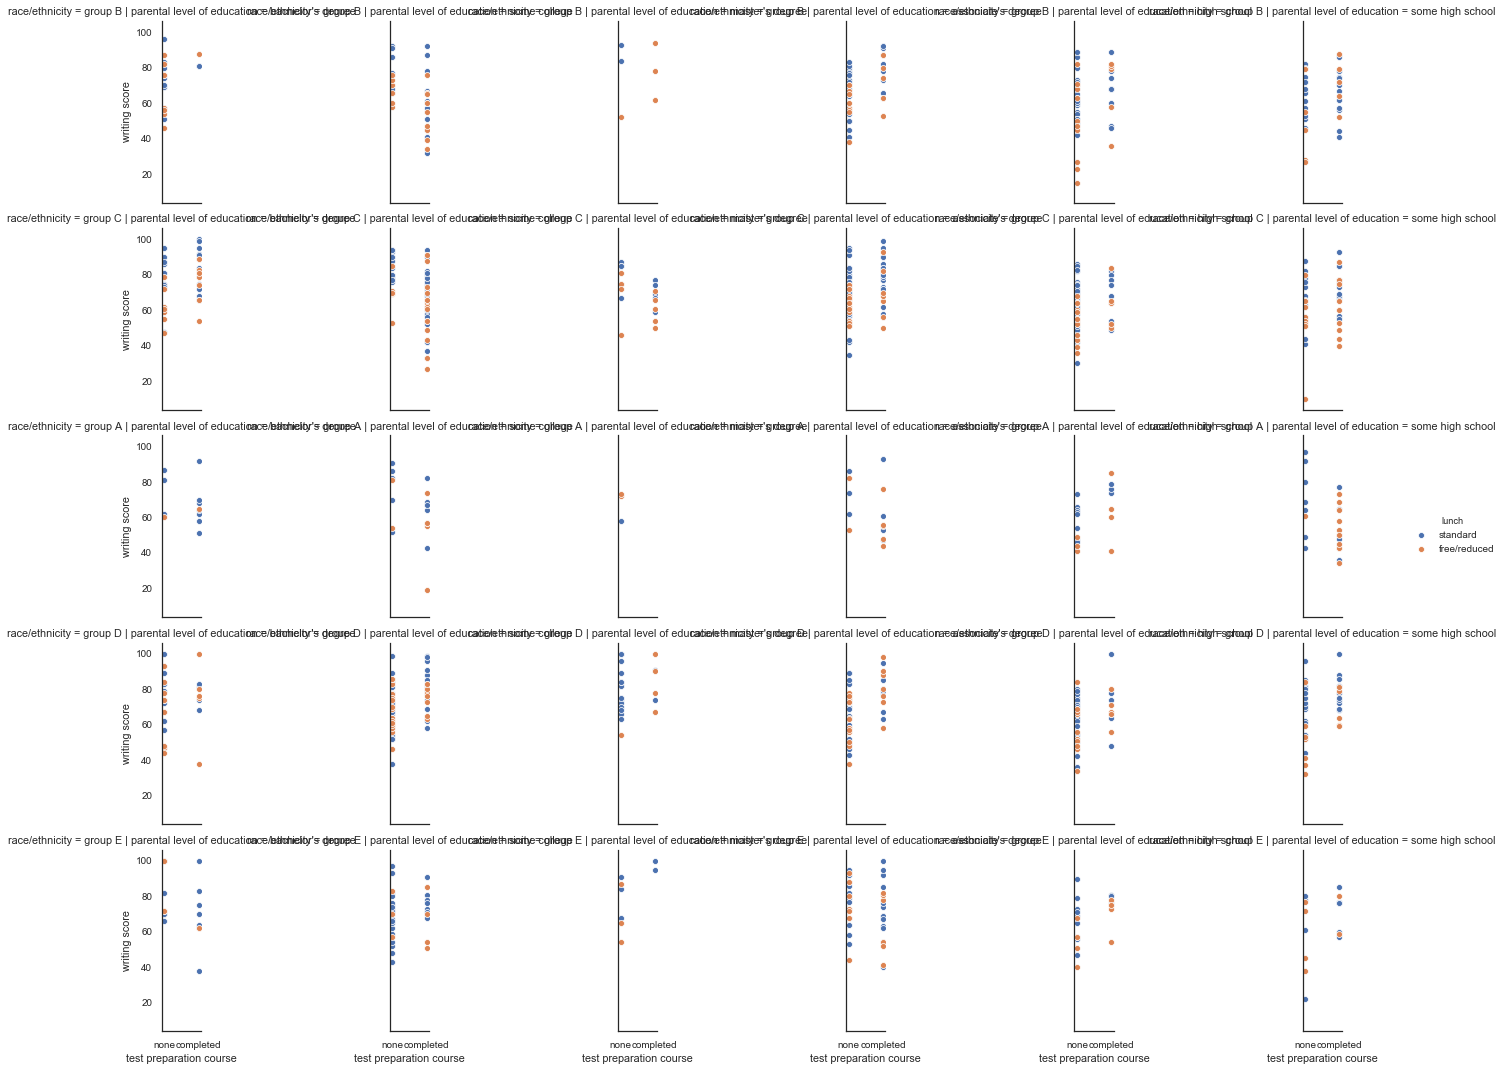

In [83]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', row='race/ethnicity', hue='lunch')
cond_plot.map(sns.scatterplot, 'test preparation course', 'writing score').add_legend()

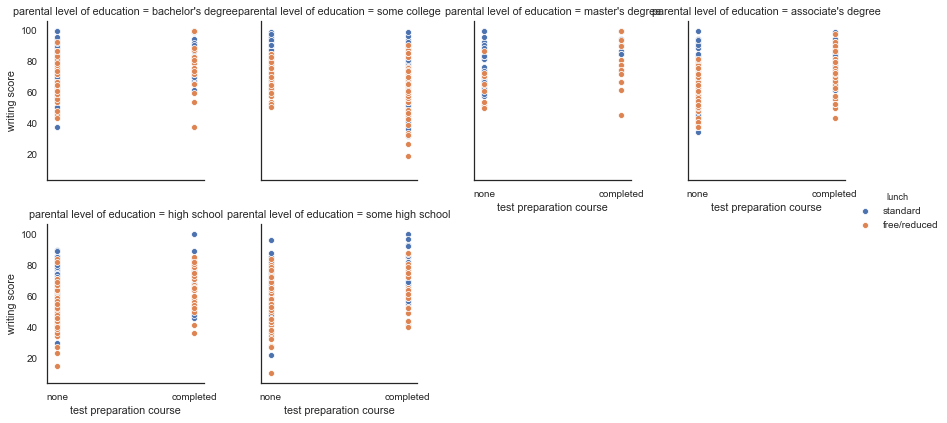

In [84]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'writing score').add_legend()

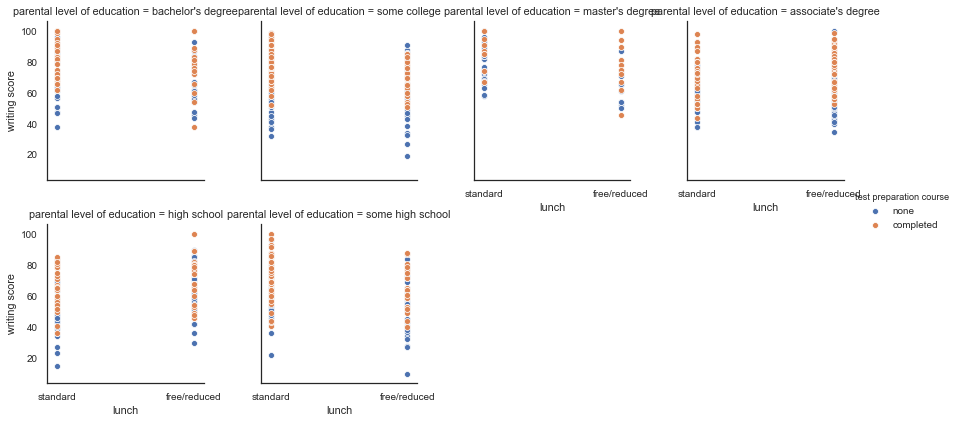

In [85]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='parental level of education', hue='test preparation course',col_wrap=4)
cond_plot.map(sns.scatterplot, 'lunch', 'writing score').add_legend()

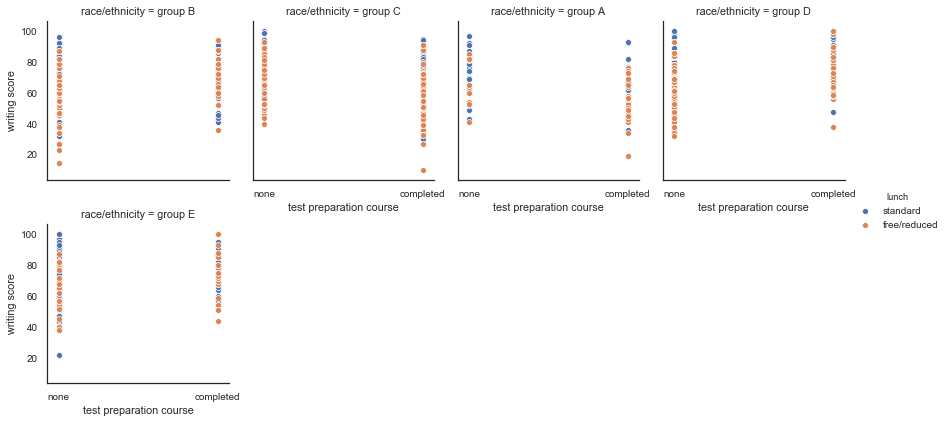

In [86]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='race/ethnicity', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'writing score').add_legend()

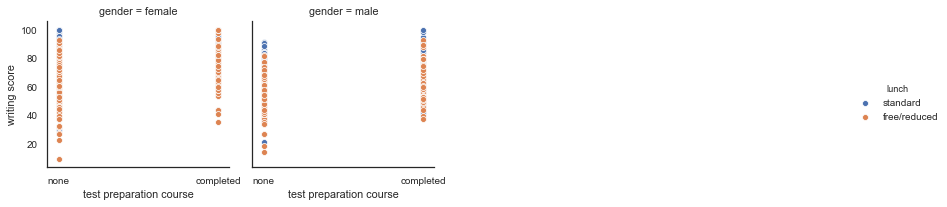

In [87]:
sns.set(style='white', palette="deep", font_scale=0.9, rc={"figure.figsize": [50, 30]})
cond_plot =sns.FacetGrid(data=student_data, col='gender', hue='lunch',col_wrap=4)
cond_plot.map(sns.scatterplot, 'test preparation course', 'writing score').add_legend()

In [ ]:
#we can drop gender and race column for any linear regression problem solving as they are not of much importance
#all other columns have theor effect on the dependent variable hence they are important variables
#all other insights and assumptions are written in between codes as comments